In [3]:
import pandas
import matplotlib.pyplot as plt

Zadání 1

Načtení dat a zobrazení infa

In [4]:
platy = pandas.read_csv('platy_2021_02.csv')
print('Dataframe s platy')
display(platy.head())
display(platy.info())

Dataframe s platy


,cislo_zamestnance,plat
0,3,54900.0
1,6,54800.0
2,7,36400.0
3,8,47900.0
4,16,34200.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cislo_zamestnance  43 non-null     int64  
 1   plat               43 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 820.0 bytes


None

Histogram s platy

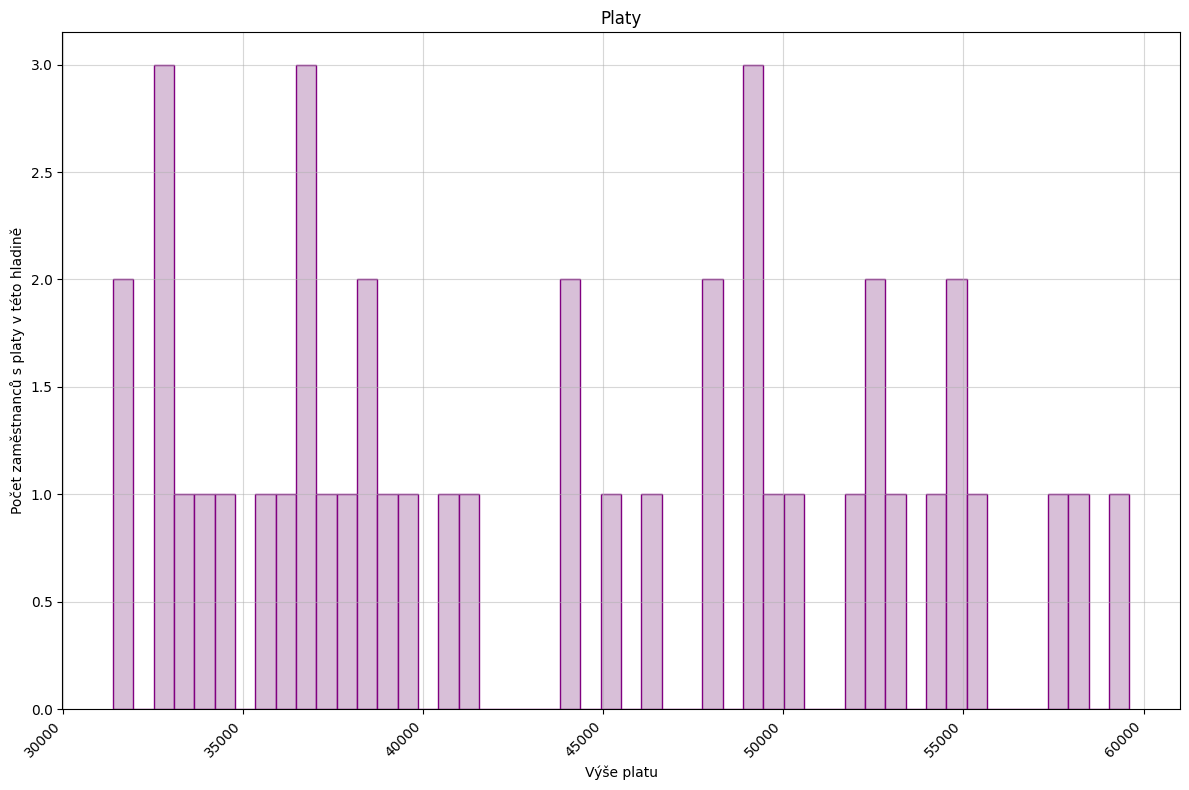

In [45]:
plt.figure(figsize=(12, 8)) 
plt.hist(platy['plat'], bins=50, color='thistle', edgecolor='purple')
plt.title('Platy')
plt.xlabel('Výše platu')
plt.ylabel('Počet zaměstnanců s platy v této hladině')
plt.xticks(rotation=45, ha='right') 
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout() 
plt.show()

Bonus 1

Načtení dat a zobrazení infa

In [6]:
teploty = pandas.read_csv('temperature.csv')
print('Dataframe s teplotama')
display(teploty.head())
display(teploty.info())

Dataframe s teplotama


,Region,Country,City,Day,AvgTemperature
0,Africa,Algeria,Algiers,1,62.0
1,Africa,Algeria,Algiers,2,62.2
2,Africa,Algeria,Algiers,3,65.7
3,Africa,Algeria,Algiers,4,69.8
4,Africa,Algeria,Algiers,5,63.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          8790 non-null   object 
 1   Country         8790 non-null   object 
 2   City            8790 non-null   object 
 3   Day             8790 non-null   int64  
 4   AvgTemperature  8790 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 343.5+ KB


None

Vytvoř tabulku, která bude obsahovat údaje o teplotě za města Helsinki, Miami Beach a Tokyo

In [10]:
teploty_mesta = teploty[teploty['City'].isin(['Helsinki', 'Miami Beach', 'Tokyo'])]
print('Dataframe s teplotama v Helsinkách, Miami a Tokyu')
teploty_mesta


Dataframe s teplotama v Helsinkách, Miami a Tokyu


,Region,Country,City,Day,AvgTemperature
1140,Asia,Japan,Tokyo,1,59.1
1141,Asia,Japan,Tokyo,2,62.3
1142,Asia,Japan,Tokyo,3,64.1
1143,Asia,Japan,Tokyo,4,59.6
1144,Asia,Japan,Tokyo,5,57.0
...,...,...,...,...,...
5035,North America,US,Miami Beach,26,73.5
5036,North America,US,Miami Beach,27,73.1
5037,North America,US,Miami Beach,28,77.5
5038,North America,US,Miami Beach,29,77.7


In [13]:
teploty['AvgTemperatureC'] = round((teploty['AvgTemperature'] - 32) * 5/9, 1)
print('Dataframe s přidanýma teplotama ve stupních Celsia pro lepší čitelnost pro Evropany :)')
teploty

Dataframe s přidanýma teplotama ve stupních Celsia pro lepší čitelnost pro Evropany :)


,Region,Country,City,Day,AvgTemperature,AvgTemperatureC
0,Africa,Algeria,Algiers,1,62.0,16.7
1,Africa,Algeria,Algiers,2,62.2,16.8
2,Africa,Algeria,Algiers,3,65.7,18.7
3,Africa,Algeria,Algiers,4,69.8,21.0
4,Africa,Algeria,Algiers,5,63.8,17.7
...,...,...,...,...,...,...
8785,North America,US,Cheyenne,26,51.7,10.9
8786,North America,US,Cheyenne,27,55.5,13.1
8787,North America,US,Cheyenne,28,38.5,3.6
8788,North America,US,Cheyenne,29,36.8,2.7


Vytvoř krabicový graf a porovnej rozsah teplot v těchto městech

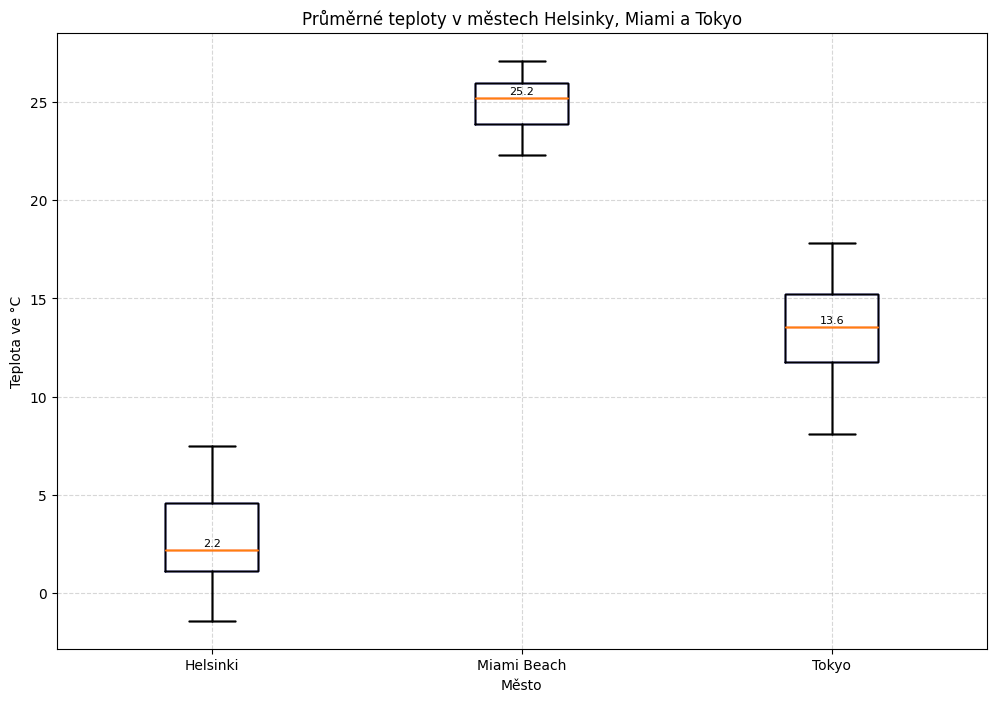

In [73]:
plt.figure(figsize=(12, 8)) 
cities = ['Helsinki', 'Miami Beach', 'Tokyo']
plt.boxplot([teploty[teploty['City'] == city]['AvgTemperatureC'] for city in cities],
            labels=cities, boxprops=dict(color='blue'), medianprops=dict(color='red'))
plt.title('Průměrné teploty v městech Helsinky, Miami a Tokyo')
plt.xlabel('Město')
plt.ylabel('Teplota ve °C')
plt.grid(True, linestyle='--', alpha=0.5)

for i, city in enumerate(cities):
    median = plt.boxplot([teploty[teploty['City'] == city]['AvgTemperatureC'] for city in cities])['medians'][i].get_ydata()[0]
    plt.text(i + 1, median + 0.1, f'{median:.1f}', ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(range(1, len(cities) + 1), cities)

plt.show()

